In [28]:
import os
import sys
from glob import glob
import yaml
import ROOT
import pandas as pd
import root_pandas as rpd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

2022-05-08 22:27:09.673330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/gridengine/lib/lx-amd64:/opt/openmpi/lib
2022-05-08 22:27:09.673395: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/home/gsaha/Work/DelphesML/Project2/XGBoost/DL_MX_60_Final already exists ...
No of signal processes : 1, bkg processes : 12
(122726, 22)
(30683, 22)
Train --> Sig : 49020   Bkg : 73706
Test  --> Sig : 12256    Bkg : 18427
[23:17:25] WARNING: ../src/learner.cc:576: 
Parameters: { "evals_result" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-error:0.25408	validation_0-auc:0.81907	validation_0-aucpr:0.71262	validation_0-logloss:0.69002	validation_1-error:0.25789	validation_1-auc:0.81508	validation_1-aucpr:0.71097	validation_1-logloss:0.69007
[1]	validation_0-error:0.25263	validation_0-auc:0.81979	validation_0-aucpr:0.71315	validation_0-logloss:0.68697	validation_1-error:0.25744	validation_1-auc:0.81590	validation_1-aucpr:0.71144	val

[35]	validation_0-error:0.24655	validation_0-auc:0.83695	validation_0-aucpr:0.75612	validation_0-logloss:0.60992	validation_1-error:0.25079	validation_1-auc:0.83334	validation_1-aucpr:0.75565	validation_1-logloss:0.61099
[36]	validation_0-error:0.24650	validation_0-auc:0.83734	validation_0-aucpr:0.75648	validation_0-logloss:0.60823	validation_1-error:0.25076	validation_1-auc:0.83371	validation_1-aucpr:0.75598	validation_1-logloss:0.60935
[37]	validation_0-error:0.24638	validation_0-auc:0.83758	validation_0-aucpr:0.75676	validation_0-logloss:0.60656	validation_1-error:0.25050	validation_1-auc:0.83398	validation_1-aucpr:0.75634	validation_1-logloss:0.60769
[38]	validation_0-error:0.24600	validation_0-auc:0.83785	validation_0-aucpr:0.75723	validation_0-logloss:0.60495	validation_1-error:0.25033	validation_1-auc:0.83419	validation_1-aucpr:0.75662	validation_1-logloss:0.60612
[39]	validation_0-error:0.24566	validation_0-auc:0.83807	validation_0-aucpr:0.75741	validation_0-logloss:0.60334	val

[73]	validation_0-error:0.24219	validation_0-auc:0.84373	validation_0-aucpr:0.76703	validation_0-logloss:0.56091	validation_1-error:0.24499	validation_1-auc:0.83985	validation_1-aucpr:0.76524	validation_1-logloss:0.56293
[74]	validation_0-error:0.24199	validation_0-auc:0.84382	validation_0-aucpr:0.76709	validation_0-logloss:0.55994	validation_1-error:0.24532	validation_1-auc:0.83995	validation_1-aucpr:0.76528	validation_1-logloss:0.56197
[75]	validation_0-error:0.24196	validation_0-auc:0.84390	validation_0-aucpr:0.76723	validation_0-logloss:0.55901	validation_1-error:0.24522	validation_1-auc:0.83998	validation_1-aucpr:0.76530	validation_1-logloss:0.56109
[76]	validation_0-error:0.24191	validation_0-auc:0.84397	validation_0-aucpr:0.76720	validation_0-logloss:0.55807	validation_1-error:0.24509	validation_1-auc:0.84005	validation_1-aucpr:0.76527	validation_1-logloss:0.56017
[77]	validation_0-error:0.24186	validation_0-auc:0.84407	validation_0-aucpr:0.76736	validation_0-logloss:0.55716	val

[111]	validation_0-error:0.23948	validation_0-auc:0.84774	validation_0-aucpr:0.77408	validation_0-logloss:0.53184	validation_1-error:0.24382	validation_1-auc:0.84354	validation_1-aucpr:0.77140	validation_1-logloss:0.53478
[112]	validation_0-error:0.23941	validation_0-auc:0.84784	validation_0-aucpr:0.77415	validation_0-logloss:0.53123	validation_1-error:0.24362	validation_1-auc:0.84368	validation_1-aucpr:0.77176	validation_1-logloss:0.53417
[113]	validation_0-error:0.23930	validation_0-auc:0.84789	validation_0-aucpr:0.77420	validation_0-logloss:0.53067	validation_1-error:0.24352	validation_1-auc:0.84372	validation_1-aucpr:0.77180	validation_1-logloss:0.53364
[114]	validation_0-error:0.23925	validation_0-auc:0.84799	validation_0-aucpr:0.77447	validation_0-logloss:0.53010	validation_1-error:0.24349	validation_1-auc:0.84383	validation_1-aucpr:0.77231	validation_1-logloss:0.53308
[115]	validation_0-error:0.23910	validation_0-auc:0.84811	validation_0-aucpr:0.77463	validation_0-logloss:0.5295

[148]	validation_0-error:0.23611	validation_0-auc:0.85153	validation_0-aucpr:0.78100	validation_0-logloss:0.51372	validation_1-error:0.24026	validation_1-auc:0.84701	validation_1-aucpr:0.77742	validation_1-logloss:0.51753
[149]	validation_0-error:0.23601	validation_0-auc:0.85162	validation_0-aucpr:0.78113	validation_0-logloss:0.51333	validation_1-error:0.24010	validation_1-auc:0.84709	validation_1-aucpr:0.77752	validation_1-logloss:0.51716
[150]	validation_0-error:0.23588	validation_0-auc:0.85172	validation_0-aucpr:0.78127	validation_0-logloss:0.51291	validation_1-error:0.24026	validation_1-auc:0.84717	validation_1-aucpr:0.77763	validation_1-logloss:0.51677
[151]	validation_0-error:0.23592	validation_0-auc:0.85184	validation_0-aucpr:0.78156	validation_0-logloss:0.51250	validation_1-error:0.24030	validation_1-auc:0.84727	validation_1-aucpr:0.77792	validation_1-logloss:0.51640
[152]	validation_0-error:0.23576	validation_0-auc:0.85192	validation_0-aucpr:0.78168	validation_0-logloss:0.5121

[185]	validation_0-error:0.23368	validation_0-auc:0.85465	validation_0-aucpr:0.78652	validation_0-logloss:0.50143	validation_1-error:0.23899	validation_1-auc:0.84975	validation_1-aucpr:0.78142	validation_1-logloss:0.50613
[186]	validation_0-error:0.23372	validation_0-auc:0.85470	validation_0-aucpr:0.78661	validation_0-logloss:0.50118	validation_1-error:0.23896	validation_1-auc:0.84979	validation_1-aucpr:0.78149	validation_1-logloss:0.50590
[187]	validation_0-error:0.23369	validation_0-auc:0.85480	validation_0-aucpr:0.78680	validation_0-logloss:0.50090	validation_1-error:0.23883	validation_1-auc:0.84989	validation_1-aucpr:0.78161	validation_1-logloss:0.50563
[188]	validation_0-error:0.23354	validation_0-auc:0.85486	validation_0-aucpr:0.78685	validation_0-logloss:0.50063	validation_1-error:0.23873	validation_1-auc:0.84994	validation_1-aucpr:0.78162	validation_1-logloss:0.50538
[189]	validation_0-error:0.23353	validation_0-auc:0.85494	validation_0-aucpr:0.78700	validation_0-logloss:0.5003

[222]	validation_0-error:0.23140	validation_0-auc:0.85726	validation_0-aucpr:0.79054	validation_0-logloss:0.49268	validation_1-error:0.23593	validation_1-auc:0.85200	validation_1-aucpr:0.78437	validation_1-logloss:0.49821
[223]	validation_0-error:0.23140	validation_0-auc:0.85734	validation_0-aucpr:0.79070	validation_0-logloss:0.49248	validation_1-error:0.23577	validation_1-auc:0.85208	validation_1-aucpr:0.78448	validation_1-logloss:0.49802
[224]	validation_0-error:0.23127	validation_0-auc:0.85740	validation_0-aucpr:0.79076	validation_0-logloss:0.49229	validation_1-error:0.23577	validation_1-auc:0.85211	validation_1-aucpr:0.78450	validation_1-logloss:0.49784
[225]	validation_0-error:0.23122	validation_0-auc:0.85746	validation_0-aucpr:0.79084	validation_0-logloss:0.49210	validation_1-error:0.23580	validation_1-auc:0.85216	validation_1-aucpr:0.78454	validation_1-logloss:0.49768
[226]	validation_0-error:0.23111	validation_0-auc:0.85753	validation_0-aucpr:0.79094	validation_0-logloss:0.4918

[259]	validation_0-error:0.22862	validation_0-auc:0.86007	validation_0-aucpr:0.79473	validation_0-logloss:0.48557	validation_1-error:0.23355	validation_1-auc:0.85440	validation_1-aucpr:0.78758	validation_1-logloss:0.49191
[260]	validation_0-error:0.22857	validation_0-auc:0.86010	validation_0-aucpr:0.79478	validation_0-logloss:0.48543	validation_1-error:0.23339	validation_1-auc:0.85442	validation_1-aucpr:0.78758	validation_1-logloss:0.49180
[261]	validation_0-error:0.22841	validation_0-auc:0.86020	validation_0-aucpr:0.79491	validation_0-logloss:0.48523	validation_1-error:0.23332	validation_1-auc:0.85450	validation_1-aucpr:0.78767	validation_1-logloss:0.49163
[262]	validation_0-error:0.22842	validation_0-auc:0.86025	validation_0-aucpr:0.79500	validation_0-logloss:0.48508	validation_1-error:0.23345	validation_1-auc:0.85453	validation_1-aucpr:0.78766	validation_1-logloss:0.49152
[263]	validation_0-error:0.22822	validation_0-auc:0.86034	validation_0-aucpr:0.79515	validation_0-logloss:0.4848

[296]	validation_0-error:0.22660	validation_0-auc:0.86246	validation_0-aucpr:0.79840	validation_0-logloss:0.48015	validation_1-error:0.23192	validation_1-auc:0.85644	validation_1-aucpr:0.79009	validation_1-logloss:0.48724
[297]	validation_0-error:0.22646	validation_0-auc:0.86257	validation_0-aucpr:0.79856	validation_0-logloss:0.47997	validation_1-error:0.23212	validation_1-auc:0.85652	validation_1-aucpr:0.79020	validation_1-logloss:0.48708
[298]	validation_0-error:0.22638	validation_0-auc:0.86264	validation_0-aucpr:0.79868	validation_0-logloss:0.47981	validation_1-error:0.23198	validation_1-auc:0.85659	validation_1-aucpr:0.79031	validation_1-logloss:0.48696
[299]	validation_0-error:0.22628	validation_0-auc:0.86274	validation_0-aucpr:0.79885	validation_0-logloss:0.47965	validation_1-error:0.23192	validation_1-auc:0.85668	validation_1-aucpr:0.79043	validation_1-logloss:0.48681
[300]	validation_0-error:0.22636	validation_0-auc:0.86278	validation_0-aucpr:0.79892	validation_0-logloss:0.4795

[333]	validation_0-error:0.22442	validation_0-auc:0.86486	validation_0-aucpr:0.80188	validation_0-logloss:0.47540	validation_1-error:0.23081	validation_1-auc:0.85848	validation_1-aucpr:0.79253	validation_1-logloss:0.48315
[334]	validation_0-error:0.22434	validation_0-auc:0.86491	validation_0-aucpr:0.80195	validation_0-logloss:0.47530	validation_1-error:0.23075	validation_1-auc:0.85851	validation_1-aucpr:0.79258	validation_1-logloss:0.48307
[335]	validation_0-error:0.22435	validation_0-auc:0.86498	validation_0-aucpr:0.80208	validation_0-logloss:0.47515	validation_1-error:0.23058	validation_1-auc:0.85857	validation_1-aucpr:0.79269	validation_1-logloss:0.48295
[336]	validation_0-error:0.22421	validation_0-auc:0.86504	validation_0-aucpr:0.80215	validation_0-logloss:0.47503	validation_1-error:0.23026	validation_1-auc:0.85862	validation_1-aucpr:0.79274	validation_1-logloss:0.48285
[337]	validation_0-error:0.22414	validation_0-auc:0.86510	validation_0-aucpr:0.80222	validation_0-logloss:0.4749

[370]	validation_0-error:0.22263	validation_0-auc:0.86697	validation_0-aucpr:0.80487	validation_0-logloss:0.47131	validation_1-error:0.22882	validation_1-auc:0.86027	validation_1-aucpr:0.79487	validation_1-logloss:0.47969
[371]	validation_0-error:0.22254	validation_0-auc:0.86702	validation_0-aucpr:0.80495	validation_0-logloss:0.47120	validation_1-error:0.22873	validation_1-auc:0.86033	validation_1-aucpr:0.79495	validation_1-logloss:0.47959
[372]	validation_0-error:0.22257	validation_0-auc:0.86706	validation_0-aucpr:0.80499	validation_0-logloss:0.47111	validation_1-error:0.22882	validation_1-auc:0.86035	validation_1-aucpr:0.79498	validation_1-logloss:0.47952
[373]	validation_0-error:0.22260	validation_0-auc:0.86711	validation_0-aucpr:0.80505	validation_0-logloss:0.47102	validation_1-error:0.22886	validation_1-auc:0.86040	validation_1-aucpr:0.79504	validation_1-logloss:0.47944
[374]	validation_0-error:0.22260	validation_0-auc:0.86716	validation_0-aucpr:0.80512	validation_0-logloss:0.4709

[407]	validation_0-error:0.22117	validation_0-auc:0.86876	validation_0-aucpr:0.80747	validation_0-logloss:0.46778	validation_1-error:0.22847	validation_1-auc:0.86165	validation_1-aucpr:0.79685	validation_1-logloss:0.47687
[408]	validation_0-error:0.22114	validation_0-auc:0.86880	validation_0-aucpr:0.80754	validation_0-logloss:0.46769	validation_1-error:0.22840	validation_1-auc:0.86169	validation_1-aucpr:0.79690	validation_1-logloss:0.47680
[409]	validation_0-error:0.22116	validation_0-auc:0.86885	validation_0-aucpr:0.80759	validation_0-logloss:0.46761	validation_1-error:0.22837	validation_1-auc:0.86172	validation_1-aucpr:0.79694	validation_1-logloss:0.47674
[410]	validation_0-error:0.22107	validation_0-auc:0.86890	validation_0-aucpr:0.80767	validation_0-logloss:0.46750	validation_1-error:0.22860	validation_1-auc:0.86176	validation_1-aucpr:0.79698	validation_1-logloss:0.47666
[411]	validation_0-error:0.22107	validation_0-auc:0.86895	validation_0-aucpr:0.80773	validation_0-logloss:0.4674

[444]	validation_0-error:0.21958	validation_0-auc:0.87036	validation_0-aucpr:0.80969	validation_0-logloss:0.46470	validation_1-error:0.22830	validation_1-auc:0.86285	validation_1-aucpr:0.79835	validation_1-logloss:0.47448
[445]	validation_0-error:0.21957	validation_0-auc:0.87039	validation_0-aucpr:0.80973	validation_0-logloss:0.46462	validation_1-error:0.22817	validation_1-auc:0.86287	validation_1-aucpr:0.79837	validation_1-logloss:0.47443
[446]	validation_0-error:0.21951	validation_0-auc:0.87042	validation_0-aucpr:0.80977	validation_0-logloss:0.46455	validation_1-error:0.22820	validation_1-auc:0.86289	validation_1-aucpr:0.79840	validation_1-logloss:0.47438
[447]	validation_0-error:0.21954	validation_0-auc:0.87047	validation_0-aucpr:0.80984	validation_0-logloss:0.46446	validation_1-error:0.22824	validation_1-auc:0.86292	validation_1-aucpr:0.79844	validation_1-logloss:0.47431
[448]	validation_0-error:0.21952	validation_0-auc:0.87051	validation_0-aucpr:0.80991	validation_0-logloss:0.4643

[481]	validation_0-error:0.21807	validation_0-auc:0.87184	validation_0-aucpr:0.81185	validation_0-logloss:0.46189	validation_1-error:0.22716	validation_1-auc:0.86391	validation_1-aucpr:0.79994	validation_1-logloss:0.47241
[482]	validation_0-error:0.21801	validation_0-auc:0.87187	validation_0-aucpr:0.81188	validation_0-logloss:0.46183	validation_1-error:0.22710	validation_1-auc:0.86393	validation_1-aucpr:0.79995	validation_1-logloss:0.47237
[483]	validation_0-error:0.21792	validation_0-auc:0.87191	validation_0-aucpr:0.81194	validation_0-logloss:0.46176	validation_1-error:0.22719	validation_1-auc:0.86396	validation_1-aucpr:0.80000	validation_1-logloss:0.47232
[484]	validation_0-error:0.21775	validation_0-auc:0.87194	validation_0-aucpr:0.81199	validation_0-logloss:0.46169	validation_1-error:0.22723	validation_1-auc:0.86398	validation_1-aucpr:0.80003	validation_1-logloss:0.47228
[485]	validation_0-error:0.21779	validation_0-auc:0.87199	validation_0-aucpr:0.81207	validation_0-logloss:0.4615

[518]	validation_0-error:0.21650	validation_0-auc:0.87308	validation_0-aucpr:0.81357	validation_0-logloss:0.45951	validation_1-error:0.22602	validation_1-auc:0.86478	validation_1-aucpr:0.80117	validation_1-logloss:0.47075
[519]	validation_0-error:0.21651	validation_0-auc:0.87311	validation_0-aucpr:0.81359	validation_0-logloss:0.45947	validation_1-error:0.22602	validation_1-auc:0.86480	validation_1-aucpr:0.80119	validation_1-logloss:0.47072
[520]	validation_0-error:0.21643	validation_0-auc:0.87313	validation_0-aucpr:0.81362	validation_0-logloss:0.45941	validation_1-error:0.22592	validation_1-auc:0.86481	validation_1-aucpr:0.80121	validation_1-logloss:0.47069
[521]	validation_0-error:0.21643	validation_0-auc:0.87314	validation_0-aucpr:0.81364	validation_0-logloss:0.45937	validation_1-error:0.22589	validation_1-auc:0.86482	validation_1-aucpr:0.80122	validation_1-logloss:0.47066
[522]	validation_0-error:0.21635	validation_0-auc:0.87320	validation_0-aucpr:0.81373	validation_0-logloss:0.4592

[555]	validation_0-error:0.21556	validation_0-auc:0.87421	validation_0-aucpr:0.81518	validation_0-logloss:0.45734	validation_1-error:0.22504	validation_1-auc:0.86549	validation_1-aucpr:0.80233	validation_1-logloss:0.46930
[556]	validation_0-error:0.21549	validation_0-auc:0.87422	validation_0-aucpr:0.81520	validation_0-logloss:0.45730	validation_1-error:0.22504	validation_1-auc:0.86550	validation_1-aucpr:0.80234	validation_1-logloss:0.46928
[557]	validation_0-error:0.21546	validation_0-auc:0.87425	validation_0-aucpr:0.81525	validation_0-logloss:0.45724	validation_1-error:0.22504	validation_1-auc:0.86551	validation_1-aucpr:0.80238	validation_1-logloss:0.46925
[558]	validation_0-error:0.21544	validation_0-auc:0.87429	validation_0-aucpr:0.81530	validation_0-logloss:0.45718	validation_1-error:0.22501	validation_1-auc:0.86553	validation_1-aucpr:0.80242	validation_1-logloss:0.46921
[559]	validation_0-error:0.21543	validation_0-auc:0.87429	validation_0-aucpr:0.81531	validation_0-logloss:0.4571

[592]	validation_0-error:0.21440	validation_0-auc:0.87515	validation_0-aucpr:0.81647	validation_0-logloss:0.45550	validation_1-error:0.22436	validation_1-auc:0.86609	validation_1-aucpr:0.80326	validation_1-logloss:0.46812
[593]	validation_0-error:0.21434	validation_0-auc:0.87517	validation_0-aucpr:0.81651	validation_0-logloss:0.45546	validation_1-error:0.22436	validation_1-auc:0.86611	validation_1-aucpr:0.80329	validation_1-logloss:0.46808
[594]	validation_0-error:0.21440	validation_0-auc:0.87519	validation_0-aucpr:0.81653	validation_0-logloss:0.45542	validation_1-error:0.22429	validation_1-auc:0.86612	validation_1-aucpr:0.80332	validation_1-logloss:0.46805
[595]	validation_0-error:0.21435	validation_0-auc:0.87523	validation_0-aucpr:0.81657	validation_0-logloss:0.45536	validation_1-error:0.22426	validation_1-auc:0.86614	validation_1-aucpr:0.80335	validation_1-logloss:0.46802
[596]	validation_0-error:0.21432	validation_0-auc:0.87527	validation_0-aucpr:0.81661	validation_0-logloss:0.4553

[629]	validation_0-error:0.21378	validation_0-auc:0.87592	validation_0-aucpr:0.81748	validation_0-logloss:0.45398	validation_1-error:0.22345	validation_1-auc:0.86657	validation_1-aucpr:0.80397	validation_1-logloss:0.46713
[630]	validation_0-error:0.21382	validation_0-auc:0.87594	validation_0-aucpr:0.81750	validation_0-logloss:0.45394	validation_1-error:0.22335	validation_1-auc:0.86659	validation_1-aucpr:0.80399	validation_1-logloss:0.46711
[631]	validation_0-error:0.21379	validation_0-auc:0.87596	validation_0-aucpr:0.81752	validation_0-logloss:0.45391	validation_1-error:0.22332	validation_1-auc:0.86659	validation_1-aucpr:0.80400	validation_1-logloss:0.46709
[632]	validation_0-error:0.21380	validation_0-auc:0.87599	validation_0-aucpr:0.81755	validation_0-logloss:0.45387	validation_1-error:0.22335	validation_1-auc:0.86661	validation_1-aucpr:0.80402	validation_1-logloss:0.46705
[633]	validation_0-error:0.21373	validation_0-auc:0.87600	validation_0-aucpr:0.81757	validation_0-logloss:0.4538

[666]	validation_0-error:0.21304	validation_0-auc:0.87667	validation_0-aucpr:0.81844	validation_0-logloss:0.45259	validation_1-error:0.22260	validation_1-auc:0.86702	validation_1-aucpr:0.80460	validation_1-logloss:0.46626
[667]	validation_0-error:0.21304	validation_0-auc:0.87669	validation_0-aucpr:0.81846	validation_0-logloss:0.45255	validation_1-error:0.22263	validation_1-auc:0.86703	validation_1-aucpr:0.80461	validation_1-logloss:0.46623
[668]	validation_0-error:0.21295	validation_0-auc:0.87672	validation_0-aucpr:0.81851	validation_0-logloss:0.45251	validation_1-error:0.22257	validation_1-auc:0.86705	validation_1-aucpr:0.80464	validation_1-logloss:0.46620
[669]	validation_0-error:0.21291	validation_0-auc:0.87674	validation_0-aucpr:0.81855	validation_0-logloss:0.45246	validation_1-error:0.22260	validation_1-auc:0.86707	validation_1-aucpr:0.80468	validation_1-logloss:0.46617
[670]	validation_0-error:0.21287	validation_0-auc:0.87677	validation_0-aucpr:0.81857	validation_0-logloss:0.4524

[703]	validation_0-error:0.21231	validation_0-auc:0.87740	validation_0-aucpr:0.81942	validation_0-logloss:0.45122	validation_1-error:0.22227	validation_1-auc:0.86745	validation_1-aucpr:0.80521	validation_1-logloss:0.46541
[704]	validation_0-error:0.21229	validation_0-auc:0.87742	validation_0-aucpr:0.81944	validation_0-logloss:0.45120	validation_1-error:0.22240	validation_1-auc:0.86746	validation_1-aucpr:0.80523	validation_1-logloss:0.46539
[705]	validation_0-error:0.21223	validation_0-auc:0.87745	validation_0-aucpr:0.81947	validation_0-logloss:0.45115	validation_1-error:0.22240	validation_1-auc:0.86748	validation_1-aucpr:0.80524	validation_1-logloss:0.46536
[706]	validation_0-error:0.21224	validation_0-auc:0.87748	validation_0-aucpr:0.81951	validation_0-logloss:0.45110	validation_1-error:0.22224	validation_1-auc:0.86750	validation_1-aucpr:0.80527	validation_1-logloss:0.46534
[707]	validation_0-error:0.21220	validation_0-auc:0.87749	validation_0-aucpr:0.81951	validation_0-logloss:0.4510

[740]	validation_0-error:0.21126	validation_0-auc:0.87816	validation_0-aucpr:0.82051	validation_0-logloss:0.44986	validation_1-error:0.22172	validation_1-auc:0.86790	validation_1-aucpr:0.80600	validation_1-logloss:0.46461
[741]	validation_0-error:0.21127	validation_0-auc:0.87818	validation_0-aucpr:0.82053	validation_0-logloss:0.44983	validation_1-error:0.22172	validation_1-auc:0.86791	validation_1-aucpr:0.80602	validation_1-logloss:0.46458
[742]	validation_0-error:0.21127	validation_0-auc:0.87819	validation_0-aucpr:0.82056	validation_0-logloss:0.44979	validation_1-error:0.22172	validation_1-auc:0.86792	validation_1-aucpr:0.80604	validation_1-logloss:0.46457
[743]	validation_0-error:0.21124	validation_0-auc:0.87821	validation_0-aucpr:0.82058	validation_0-logloss:0.44977	validation_1-error:0.22178	validation_1-auc:0.86793	validation_1-aucpr:0.80605	validation_1-logloss:0.46455
[744]	validation_0-error:0.21123	validation_0-auc:0.87822	validation_0-aucpr:0.82059	validation_0-logloss:0.4497

[777]	validation_0-error:0.21053	validation_0-auc:0.87880	validation_0-aucpr:0.82148	validation_0-logloss:0.44869	validation_1-error:0.22146	validation_1-auc:0.86826	validation_1-aucpr:0.80665	validation_1-logloss:0.46395
[778]	validation_0-error:0.21053	validation_0-auc:0.87883	validation_0-aucpr:0.82153	validation_0-logloss:0.44864	validation_1-error:0.22143	validation_1-auc:0.86828	validation_1-aucpr:0.80671	validation_1-logloss:0.46392
[779]	validation_0-error:0.21048	validation_0-auc:0.87884	validation_0-aucpr:0.82154	validation_0-logloss:0.44862	validation_1-error:0.22143	validation_1-auc:0.86828	validation_1-aucpr:0.80673	validation_1-logloss:0.46391
[780]	validation_0-error:0.21047	validation_0-auc:0.87887	validation_0-aucpr:0.82157	validation_0-logloss:0.44857	validation_1-error:0.22146	validation_1-auc:0.86830	validation_1-aucpr:0.80674	validation_1-logloss:0.46388
[781]	validation_0-error:0.21044	validation_0-auc:0.87888	validation_0-aucpr:0.82159	validation_0-logloss:0.4485

[814]	validation_0-error:0.20994	validation_0-auc:0.87941	validation_0-aucpr:0.82237	validation_0-logloss:0.44761	validation_1-error:0.22129	validation_1-auc:0.86856	validation_1-aucpr:0.80729	validation_1-logloss:0.46340
[815]	validation_0-error:0.20994	validation_0-auc:0.87943	validation_0-aucpr:0.82240	validation_0-logloss:0.44756	validation_1-error:0.22126	validation_1-auc:0.86857	validation_1-aucpr:0.80735	validation_1-logloss:0.46337
[816]	validation_0-error:0.20991	validation_0-auc:0.87946	validation_0-aucpr:0.82244	validation_0-logloss:0.44752	validation_1-error:0.22126	validation_1-auc:0.86858	validation_1-aucpr:0.80736	validation_1-logloss:0.46335
[817]	validation_0-error:0.20989	validation_0-auc:0.87946	validation_0-aucpr:0.82245	validation_0-logloss:0.44751	validation_1-error:0.22123	validation_1-auc:0.86858	validation_1-aucpr:0.80736	validation_1-logloss:0.46335
[818]	validation_0-error:0.20988	validation_0-auc:0.87947	validation_0-aucpr:0.82246	validation_0-logloss:0.4474

[851]	validation_0-error:0.20912	validation_0-auc:0.87999	validation_0-aucpr:0.82323	validation_0-logloss:0.44657	validation_1-error:0.22100	validation_1-auc:0.86883	validation_1-aucpr:0.80782	validation_1-logloss:0.46287
[852]	validation_0-error:0.20916	validation_0-auc:0.88000	validation_0-aucpr:0.82326	validation_0-logloss:0.44655	validation_1-error:0.22090	validation_1-auc:0.86884	validation_1-aucpr:0.80784	validation_1-logloss:0.46286
[853]	validation_0-error:0.20912	validation_0-auc:0.88002	validation_0-aucpr:0.82328	validation_0-logloss:0.44652	validation_1-error:0.22097	validation_1-auc:0.86885	validation_1-aucpr:0.80785	validation_1-logloss:0.46284
[854]	validation_0-error:0.20910	validation_0-auc:0.88004	validation_0-aucpr:0.82332	validation_0-logloss:0.44648	validation_1-error:0.22090	validation_1-auc:0.86886	validation_1-aucpr:0.80786	validation_1-logloss:0.46282
[855]	validation_0-error:0.20912	validation_0-auc:0.88005	validation_0-aucpr:0.82332	validation_0-logloss:0.4464

[888]	validation_0-error:0.20877	validation_0-auc:0.88050	validation_0-aucpr:0.82400	validation_0-logloss:0.44566	validation_1-error:0.22071	validation_1-auc:0.86906	validation_1-aucpr:0.80821	validation_1-logloss:0.46245
[889]	validation_0-error:0.20877	validation_0-auc:0.88050	validation_0-aucpr:0.82401	validation_0-logloss:0.44566	validation_1-error:0.22074	validation_1-auc:0.86907	validation_1-aucpr:0.80821	validation_1-logloss:0.46244
[890]	validation_0-error:0.20874	validation_0-auc:0.88052	validation_0-aucpr:0.82403	validation_0-logloss:0.44563	validation_1-error:0.22074	validation_1-auc:0.86907	validation_1-aucpr:0.80823	validation_1-logloss:0.46243
[891]	validation_0-error:0.20872	validation_0-auc:0.88053	validation_0-aucpr:0.82406	validation_0-logloss:0.44560	validation_1-error:0.22068	validation_1-auc:0.86908	validation_1-aucpr:0.80824	validation_1-logloss:0.46242
[892]	validation_0-error:0.20868	validation_0-auc:0.88054	validation_0-aucpr:0.82409	validation_0-logloss:0.4455

[925]	validation_0-error:0.20841	validation_0-auc:0.88096	validation_0-aucpr:0.82469	validation_0-logloss:0.44487	validation_1-error:0.22051	validation_1-auc:0.86926	validation_1-aucpr:0.80856	validation_1-logloss:0.46209
[926]	validation_0-error:0.20838	validation_0-auc:0.88098	validation_0-aucpr:0.82471	validation_0-logloss:0.44485	validation_1-error:0.22061	validation_1-auc:0.86927	validation_1-aucpr:0.80857	validation_1-logloss:0.46208
[927]	validation_0-error:0.20835	validation_0-auc:0.88098	validation_0-aucpr:0.82472	validation_0-logloss:0.44483	validation_1-error:0.22061	validation_1-auc:0.86927	validation_1-aucpr:0.80858	validation_1-logloss:0.46207
[928]	validation_0-error:0.20837	validation_0-auc:0.88100	validation_0-aucpr:0.82474	validation_0-logloss:0.44481	validation_1-error:0.22051	validation_1-auc:0.86928	validation_1-aucpr:0.80859	validation_1-logloss:0.46206
[929]	validation_0-error:0.20833	validation_0-auc:0.88101	validation_0-aucpr:0.82476	validation_0-logloss:0.4447

[962]	validation_0-error:0.20806	validation_0-auc:0.88133	validation_0-aucpr:0.82520	validation_0-logloss:0.44424	validation_1-error:0.22009	validation_1-auc:0.86939	validation_1-aucpr:0.80875	validation_1-logloss:0.46185
[963]	validation_0-error:0.20805	validation_0-auc:0.88135	validation_0-aucpr:0.82522	validation_0-logloss:0.44421	validation_1-error:0.22015	validation_1-auc:0.86940	validation_1-aucpr:0.80876	validation_1-logloss:0.46185
[964]	validation_0-error:0.20797	validation_0-auc:0.88136	validation_0-aucpr:0.82523	validation_0-logloss:0.44419	validation_1-error:0.22019	validation_1-auc:0.86940	validation_1-aucpr:0.80876	validation_1-logloss:0.46184
[965]	validation_0-error:0.20796	validation_0-auc:0.88136	validation_0-aucpr:0.82523	validation_0-logloss:0.44419	validation_1-error:0.22025	validation_1-auc:0.86940	validation_1-aucpr:0.80876	validation_1-logloss:0.46184
[966]	validation_0-error:0.20796	validation_0-auc:0.88137	validation_0-aucpr:0.82524	validation_0-logloss:0.4441

[999]	validation_0-error:0.20761	validation_0-auc:0.88170	validation_0-aucpr:0.82568	validation_0-logloss:0.44359	validation_1-error:0.22009	validation_1-auc:0.86952	validation_1-aucpr:0.80892	validation_1-logloss:0.46159


/home/gsaha/anaconda3/envs/PyROOT_Env/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0 1 0 ... 0 0 0]


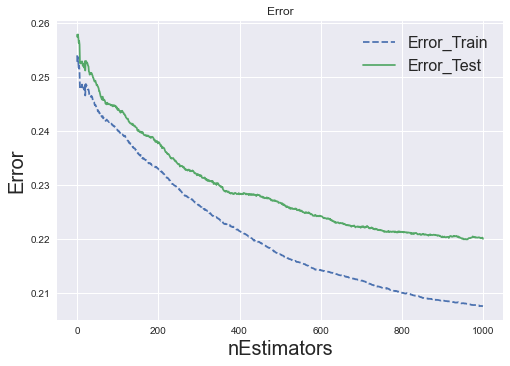

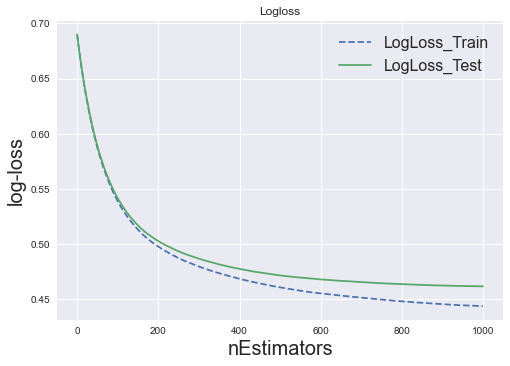

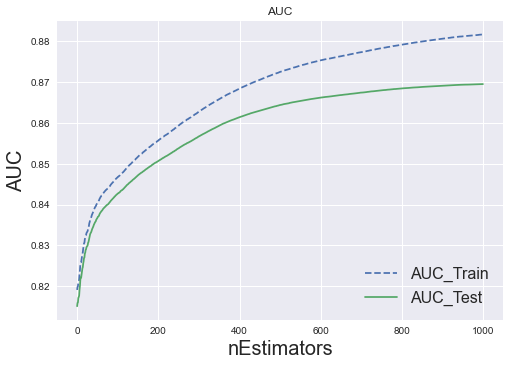

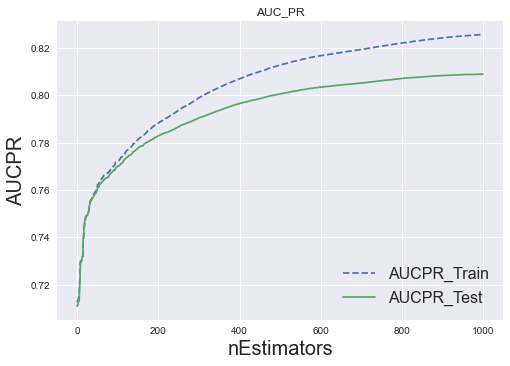

Best score : 0.461592, Best iteration : 999


<Figure size 576x396 with 0 Axes>

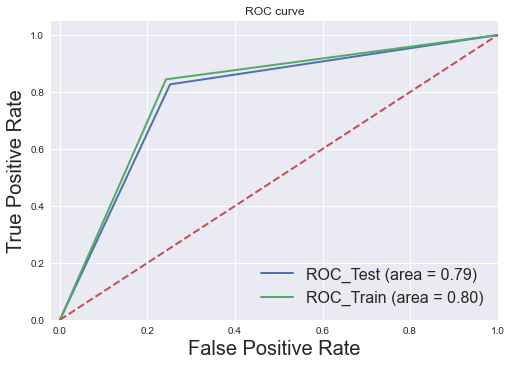

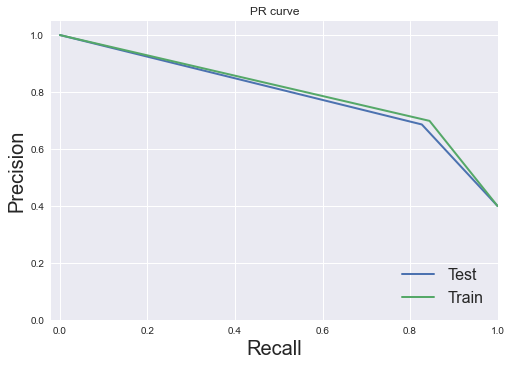

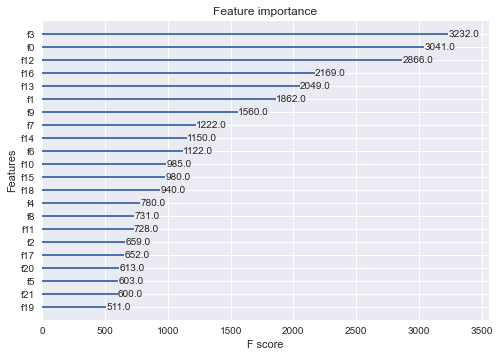

In [48]:
with open('config_train_MX60_DL.yaml','r') as conf:
    config = yaml.safe_load(conf)
mainkeys    = list(config.keys())
tag         = config.get('Tag')
pwd         = os.getcwd()
tagdir      = os.path.join(pwd,tag)

if not os.path.exists(tag):
    os.mkdir(tagdir)
else:
    print(f'{tagdir} already exists ...')

maintree    = config.get('intree')
infiledict  = config.get('infiles')
#print(infiledict)
clskeys = list(infiledict.keys())
#print(clskeys)
featurelist = config.get('features') 

signaldict = infiledict.get('Signal')
backgrounddict = infiledict.get('Background')
signal_info_list     = list(signaldict.values())
background_info_list = list(backgrounddict.values())
'''
# List of list [['sample1_path',xsec1], ['sample2_path', xsec2], ......]
signal_root_df_list = list(signaldict.values())
background_root_df_list = list(backgrounddict.values())

dfs_signal = []
dfs_background = []
for item in signal_root_df_list:
    path  = item[0]
    clswt = item[1] # xsec
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 1
    dfs_signal.append(dfitem)

for item in background_root_df_list:
    path  = item[0]
    clswt = item[1] # xsec
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 0
    dfs_background.append(dfitem)

print(f'No of signal processes : {len(dfs_signal)}, bkg processes : {len(dfs_background)}')

sigtrain, sigtest   = train_test_split(dfs_signal[0],     test_size=0.2, random_state=42, shuffle=True)
bkg1train, bkg1test = train_test_split(dfs_background[0], test_size=0.2, random_state=42, shuffle=True)
bkg2train, bkg2test = train_test_split(dfs_background[1], test_size=0.2, random_state=42, shuffle=True)
bkg3train, bkg3test = train_test_split(dfs_background[2], test_size=0.2, random_state=42, shuffle=True)
'''
dfs_signal     = []
dfs_background = []
for item in signal_info_list:
    path   = item[0]
    xsec   = item[1] # xsec
    nEvProd= item[2]   
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 1
    #dfitem['tag'] = np.ones(dfitem.shape[0])
    #dfitem['wtd_events'] = np.ones(dfitem.shape[0])
    ##dfitem['wtd_events'] = dfitem.shape[0]
    dfitem['wt'] = 1.0/nEvProd
    dfs_signal.append(dfitem)

for item in background_info_list:
    path  = item[0]
    xsec  = item[1] # xsec
    nEvProd= item[2]
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    #dfitem['tag'] = np.zeros(dfitem.shape[0])
    dfitem['tag'] = 0
    #dfitem['wtd_events'] = xsec*np.ones(dfitem.shape[0])
    #dfitem['wtd_events'] = xsec*dfitem.shape[0]
    dfitem['wt'] = xsec/nEvProd
    dfs_background.append(dfitem)

print(f'No of signal processes : {len(dfs_signal)}, bkg processes : {len(dfs_background)}')

df_total_sig = pd.concat(dfs_signal)
df_total_sig['rel_weight'] = 1.0
totwt = 0.0
for df in dfs_background:
    #print(f'''backgrounddddddd : {df['wt']}  : shape : {df.shape[0]} \n\n''')
    totwt += df['wt'][0] * df.shape[0]

for df in dfs_background:
    df['rel_weight'] = df['wt'] * df.shape[0] / totwt
    
df_total_bkg = pd.concat(dfs_background)      


#print(f'Total bkg weight : {totwt}\n\n\n')

#print(f'df_Signal shape      : {df_total_sig.shape}')
#print(df_total_sig.head())
#print(f'df_Background shape  : {df_total_bkg.shape}')    
#print(df_total_bkg.head())    
    
#plotinputfeatures(featuredict, df_total_sig, df_total_bkg, tag='_raw')    

#df_total_sig_ = df_total_sig[featurelist + ['tag']]
#df_total_bkg_ = df_total_bkg[featurelist + ['tag']]

'''
# Correlation matrices
### Both for signal and background
################### For Correlation matrix ######################
df_sig = df_total_sig[featurelist + ['tag']].iloc[:,:-1]
df_bkg = df_total_bkg[featurelist + ['tag']].iloc[:,:-1]
corrlMatrix_sig = df_sig.corr()
corrlMatrix_bkg = df_bkg.corr()

plt.figure(figsize=(15,12.5))
sns.heatmap(corrlMatrix_sig, cmap='YlGnBu', annot=True, annot_kws={'size':13}, fmt='.2f')
plt.title('Correlation Matrix [Signal]')
plt.savefig(os.path.join(tagdir,'Corr_matrix_signal.png'), dpi=300)
plt.show()
plt.clf()
plt.figure(figsize=(15,12.5))
sns.heatmap(corrlMatrix_bkg, cmap='YlGnBu', annot=True, annot_kws={'size':13}, fmt='.2f')
plt.title('Correlation Matrix [Background]')
plt.savefig(os.path.join(tagdir,'Corr_matrix_bkg.png'), dpi=300)
plt.show()
plt.clf()
#################################################################
'''
sigtrain,  sigtest  = train_test_split(df_total_sig,  test_size=0.2,   random_state=42, shuffle=True)
bkgtrain,  bkgtest  = train_test_split(df_total_bkg,  test_size=0.2,   random_state=42, shuffle=True)

df_train = pd.concat([sigtrain,bkgtrain])
df_train.sample(frac=1)
df_test  = pd.concat([sigtest,bkgtest])
df_test.sample(frac=1)



#df_train = df_train[featurelist + ['tag']]
#df_test  = df_test[featurelist + ['tag']]

#print(f'df_TRAIN shape : {df_train.shape}')
#print(f'df_TEST shape  : {df_test.shape}')


# Keep the sample weights separate
train_weight = df_train [['rel_weight']].to_numpy()
test_weight  = df_test  [['rel_weight']].to_numpy()

df_train = df_train[featurelist + ['tag']]
df_test  = df_test [featurelist + ['tag']]

np_train = df_train.to_numpy()
np_test  = df_test.to_numpy()

x_train = np_train[:,:np_train.shape[1]-1]
y_train = np_train[:,-1]
print(x_train.shape)
x_test  = np_test[:,:np_test.shape[1]-1]
y_test  = np_test[:,-1]
print(x_test.shape)


print(f'Train --> Sig : {np.sum(y_train > 0)}   Bkg : {np.sum(y_train < 1)}')
print(f'Test  --> Sig : {np.sum(y_test > 0)}    Bkg : {np.sum(y_test < 1)}')

##########################################
#############################################
D_train = xgb.DMatrix(x_train, label = y_train, feature_names = featurelist)
D_test  = xgb.DMatrix(x_test,  label = y_test, feature_names = featurelist)
watchlist = [(D_train, 'train'), (D_test, 'test')]
#print(D_train)
#############################################
#############################################
#prog = dict()
max_iter = 1000
eta_min = 0.001
eta_max = 0.5
eta_decay = np.linspace(eta_min, eta_max, max_iter).tolist()
params = {
        "nthread":-1,
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": ['error','auc','aucpr','logloss'], 
        "eta": 0.01,#0.03 #0.01
        "n_estimators": 500,
        #"tree_method": 'exact',
        #"gpu_id" : -1,
        "tree_method": 'auto',
        #"predictor": "gpu_predictor",
        #"updater": "grow_gpu",
        "max_depth": 3,#3 #2
        "subsample": 1,
        "colsample_bytree": 1,
        "silent": 1,
        "min_child_weight": 1
        #"callbacks": [xgb.callback.LearningRateScheduler(eta_decay)]
    }
num_boost_round = 1000
early_stopping_rounds = 10
#############################################
#############################################
params_2 = {
        #'base_score':0.5, 
        'booster':'gbtree', 
        #'colsample_bylevel':1,
        #'colsample_bynode':1, 
        #'colsample_bytree':1, 
        'eval_metric':['error','auc','aucpr','logloss'],
        #'gamma':0, 
        #'gpu_id':-1, 
        #'importance_type':'gain',
        #'interaction_constraints':'binary:logistic', 
        'learning_rate':0.01,
        #max_delta_step=0, 
        'max_depth':5, 
        'min_child_weight':1, 
        #missing=nan,
        #monotone_constraints='()', 
        'n_estimators':1000, 
        #n_jobs=16,
        #num_parallel_tree=1, 
        #'objective='', 
        #'random_state':0,
        #reg_alpha=0, 
        #reg_lambda=1, 
        #scale_pos_weight=None, 
        'subsample':1,
        'tree_method':'auto', 
        'use_label_encoder':False,
        'evals_result':prog,
        #'validate_parameters':1, 
        'verbosity':1
        #'num_class':1
}

model = xgb.XGBClassifier(**params_2)
#xgb_param = model.get_xgb_params()
#xgb_param['num_class'] = 2
'''
model = xgb.train(params, D_train, num_boost_round, watchlist,
                  early_stopping_rounds=early_stopping_rounds, 
                  evals_result=prog,verbose_eval=True,weight=train_weight)
'''
model.fit(x_train, y_train, sample_weight=train_weight, 
          eval_set=[(x_train, y_train), (x_test, y_test)],
          eval_metric=['error','auc','aucpr','logloss'],
          early_stopping_rounds=10, 
          verbose=True
         )
#############################################
#############################################
best_tree = model.best_iteration
model.save_model(os.path.join(tagdir,'XGB_test.json'))
model.save_model(os.path.join(tagdir,'XGB_test.model'))
#model.dump_model(os.path.join(tagdir,'XGB_dump.txt'))
#############################################
#############################################
'''
preds_train = model.predict(D_train, ntree_limit=model.best_iteration)
preds = model.predict(D_test, ntree_limit=model.best_iteration)
print(preds)
'''
preds_train = model.predict(x_train, ntree_limit=model.best_iteration)
preds = model.predict(x_test, ntree_limit=model.best_iteration)
print(preds)

#############################################
#############################################
#print(prog)
prog = model.evals_result()
#print(evals_result)
#result = model.evals_result()
#evals_result['validation_0']['error']
plt.plot(prog['validation_0']['error'], linestyle='dashed',label='Error_Train')
plt.plot(prog['validation_1']['error'], linestyle='solid', label='Error_Test')
plt.title('Error')
plt.legend(loc="upper right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('Error', size=20)
plt.savefig(os.path.join(tagdir,'Error.png'),dpi=300)
plt.show()
plt.clf()
plt.plot(prog['validation_0']['logloss'], linestyle='dashed',label='LogLoss_Train')
plt.plot(prog['validation_1']['logloss'], linestyle='solid', label='LogLoss_Test')
plt.title('Logloss')
plt.legend(loc="upper right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('log-loss', size=20)
plt.savefig(os.path.join(tagdir,'LogLoss.png'),dpi=300)
plt.show()
plt.clf()
plt.plot(prog['validation_0']['auc'], linestyle='dashed',label='AUC_Train')
plt.plot(prog['validation_1']['auc'], linestyle='solid', label='AUC_Test')
plt.title('AUC')
plt.legend(loc="lower right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('AUC', size=20)
plt.savefig(os.path.join(tagdir,'AUC.png'), dpi=300)
plt.show()
plt.clf()
plt.plot(prog['validation_0']['aucpr'], linestyle='dashed',label='AUCPR_Train')
plt.plot(prog['validation_1']['aucpr'], linestyle='solid', label='AUCPR_Test')
plt.title('AUC_PR')
plt.legend(loc="lower right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('AUCPR', size=20)
plt.savefig(os.path.join(tagdir,'AUCPR.png'), dpi=300)
plt.show()
plt.clf()

print(f'Best score : {model.best_score}, Best iteration : {model.best_iteration}')
#############################################
#############################################
fpr_t, tpr_t, _ = roc_curve(y_train, preds_train)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc_t = auc(fpr_t, tpr_t)
roc_auc = auc(fpr, tpr)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr,
         lw=lw, label='ROC_Test (area = %0.2f)' % roc_auc)
plt.plot(fpr_t, tpr_t,
         lw=lw, label='ROC_Train (area = %0.2f)' % roc_auc_t)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
plt.title('ROC curve')
plt.legend(loc="lower right", fontsize=16)
plt.savefig(os.path.join(tagdir,'ROC.png'), dpi=300)
plt.show()
#############################################
#############################################
pr_t, rc_t, _ = precision_recall_curve(y_train, preds_train)
pr, rc, _ = precision_recall_curve(y_test, preds)
#auc_t = auc(pr_t, rc_t)
#auc   = auc(pr, rc)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(rc, pr, lw=lw, label='Test')
plt.plot(rc_t, pr_t, lw=lw, label='Train')
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall',size=20)
plt.ylabel('Precision',size=20)
plt.title('PR curve')
plt.legend(loc="lower right", fontsize=16)
plt.savefig(os.path.join(tagdir,'PR.png'), dpi=300)
plt.show()
#############################################
#############################################
impplot = xgb.plot_importance(model)
#plot = impplot.plot()
#fig = plot.get_figure()
plt.savefig(os.path.join(tagdir,'feature_importance.png'), dpi=300)
#############################################
#############################################
#xgb.to_graphviz(model, num_tress=2)

# Application

In [88]:
'See `XGBoost_application`'

'See `XGBoost_application`'